# Load necessary packages

In [2]:
import geopandas
from matplotlib import pyplot as plt

# make sure you are in oy-env

# Load necessary data

In [3]:
wa_puma = geopandas.read_file("data/raw/tl_2017_53_puma10.shp") 

In [4]:
wa_puma.head()

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."


In [10]:
wa_puma.loc[(wa_puma.PUMACE10 >= '11601' ) & (wa_puma.PUMACE10 <= '11616')]
# df.loc[(df.a != 1) & (df.b < 5)]

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5..."
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4..."
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5..."
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6..."
38,53,11601,5311601,Seattle City (Northwest) PUMA,G6120,S,43437175,5995523,+47.6909932,-122.3619886,"POLYGON ((-122.34043 47.64125, -122.34306 47.6..."
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7..."
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2..."
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2..."
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3..."


In [5]:
kc_puma = wa_puma[wa_puma['NAMELSAD10'].str.contains('King' or 'Seattle')]

In [52]:
kc_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5..."
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4..."
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7..."
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2..."
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2..."
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3..."
45,53,11609,5311609,"King County (Central)--Sammamish, Issaquah, Me...",G6120,S,203445872,28674310,+47.5610064,-122.0701617,"POLYGON ((-122.00610 47.63795, -122.00588 47.6..."
51,53,11607,5311607,"King County (Northwest)--Redmond, Kirkland Cit...",G6120,S,93365944,12948247,+47.6827310,-122.1668045,"POLYGON ((-122.09193 47.65352, -122.09687 47.6..."
52,53,11610,5311610,"King County (Central)--Renton City, Fairwood, ...",G6120,S,75931302,4694856,+47.4836108,-122.1904418,"POLYGON ((-122.18399 47.51673, -122.18361 47.5..."


In [29]:
# PUMA #'s:

# 11610 - 11614

## REDO THE BELOW CODE

In [53]:
# kc_puma = kc_puma[kc_puma['PUMACE10'].astype(int)]

## WE NEED TO REDO THIS SO NO ERROR
kc_puma.loc[:,'PUMACE10'] = kc_puma['PUMACE10'].astype(int)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [54]:
kc_puma['PUMACE10']

9     11612
32    11616
35    11611
39    11606
41    11615
42    11614
44    11613
45    11609
51    11607
52    11610
53    11608
Name: PUMACE10, dtype: int64

In [ ]:
# if [(kc_puma['PUMACE10'] <= 11614) & (kc_puma['PUMACE10'] >= 11610)]:
#     kc_puma['South_Marker'] = True
# else:
#     kc_puma['South_Marker'] = False

# if kc_puma['PUMACE10'].between(11610, 11614):
#     kc_puma['PUMACE10'] = 1
# else:
#     kc_puma['PUMACE10'] = 0
    
# if (kc_puma['PUMACE10'] >= 11610) & (kc_puma['PUMACE10'] <= 11614):
#     kc_puma['KCS'] = 1
# else:
#     kc_puma['KCS'] = 0

In [55]:
# Creates a new colum and sets all to false
kc_puma['KCS'] = False

//anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
# If the PUMA is in south seattle, make the value become True
kc_puma['KCS'] = kc_puma['PUMACE10'].between(11610, 11614)

//anaconda3/envs/oy-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
kc_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,KCS
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",True
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",False
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",True
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7...",False
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",False
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",True
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",True
45,53,11609,5311609,"King County (Central)--Sammamish, Issaquah, Me...",G6120,S,203445872,28674310,+47.5610064,-122.0701617,"POLYGON ((-122.00610 47.63795, -122.00588 47.6...",False
51,53,11607,5311607,"King County (Northwest)--Redmond, Kirkland Cit...",G6120,S,93365944,12948247,+47.6827310,-122.1668045,"POLYGON ((-122.09193 47.65352, -122.09687 47.6...",False
52,53,11610,5311610,"King County (Central)--Renton City, Fairwood, ...",G6120,S,75931302,4694856,+47.4836108,-122.1904418,"POLYGON ((-122.18399 47.51673, -122.18361 47.5...",True


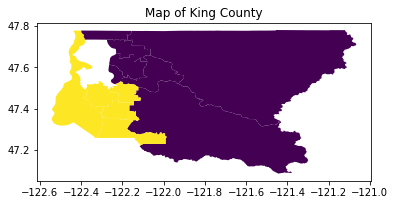

<Figure size 1440x1440 with 0 Axes>

In [60]:
fig, ax = plt.subplots(1, 1)
fig = plt.figure(figsize=(20,20))
ax.set_title('Map of King County')
kc_puma.plot(column='KCS', ax=ax, legend=False);

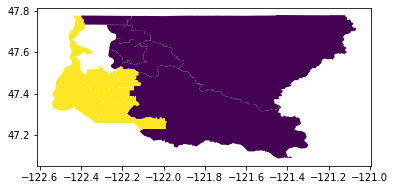

In [29]:
kc_puma.plot(column='KCS')

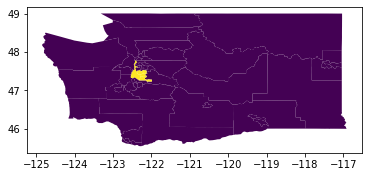

In [86]:
# this adds KCS column to all WA data
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)
wa_puma['KCS'] = False
wa_puma['KCS'] = wa_puma['PUMACE10'].between(11610, 11614)
wa_puma.plot(column='KCS')

# Plot the spacial data frame as a map

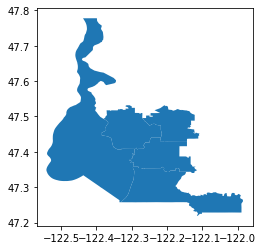

In [40]:
# fig, ax = plt.subplots(1, 1, figsize =(10, 8))
# ax.

kcs_puma.plot()
plt.show()